# 第３回 機械学習（回帰）評価と応用

## 3-1. 準備（ライブラリとファイルの読み込み、データ前処理）

In [1]:
# OS（オペレーティングシステム）に依存した機能を使うための標準ライブラリ
import os
#os.getcwd() # 現在のディレクトリを返す

In [2]:
# Library の読み込み
import sys # Pythonのインタプリタや実行環境に関する情報を扱うためのライブラリ
import pandas as pd # データを扱うための標準的なライブラリ
import numpy as np # 多次元配列を扱う数値演算ライブラリ
import scipy as sp # 高度な科学計算を行うためのライブラリ
import sklearn # 機械学習のライブラリ

import matplotlib.pyplot as plt # グラフを描画するライブラリ
%matplotlib inline 
# jupyter内に描画

In [3]:
# 電気モータの温度の予測
# CSVファイルの読み込み
df = pd.read_csv("data/pmsm_temperature_data_4.csv") # df = data frame の略
df.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


In [4]:
df.shape

(33423, 13)

In [5]:
# データの分割（学習データと検証データ）

from sklearn.model_selection import train_test_split

# 説明変数
X = pd.DataFrame(df.drop(["ambient", "profile_id"], axis=1)) 
# Pythonのコーディングでは、説明変数を大文字のXに設定することが多い

# 目的変数
y = pd.DataFrame(df.ambient)
# pd.DataFrame(df["ambient"]) でも良い

In [6]:
X.head()

,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033
1,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631
2,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343
3,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632
4,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145


In [7]:
X.shape

(33423, 11)

In [8]:
y.head()

,ambient
0,-0.752143
1,-0.771263
2,-0.782892
3,-0.780935
4,-0.774043


In [9]:
y.shape

(33423, 1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1) # X_val, y_val と設定することも多い

## 3-2. 機械学習（線形回帰）

In [11]:
# 線形回帰
from sklearn.linear_model import LinearRegression
model = LinearRegression() # clf 以外に model とする場合も多い

# モデルの学習
clf = model.fit(X_train, y_train)

# テストデータ（検証データ）で予測
y_pred = clf.predict(X_test)

## 3-3. 回帰結果の評価

In [12]:
# 回帰結果評価用関数
def Regression_evaluator(y_test, y_pred):
    # 平均絶対誤差 (MAE: Mean Absolute Error)
    from sklearn.metrics import mean_absolute_error
    print("平均絶対誤差 (MAE)'：", mean_absolute_error(y_test, y_pred))
    # 平均二乗誤差 (MSE: Mean Squared Error)
    from sklearn.metrics import mean_squared_error
    print("平均二乗誤差 (MSE)：", mean_squared_error(y_test, y_pred))
    # 二乗平均平方根誤差 (RMSE: Root Mean Squared Error) -- sklearn には実装されていないのでnumpyを利用
    import numpy as np
    print("二乗平均平方根誤差 (RMSE)：", np.sqrt(mean_squared_error(y_test, y_pred)))
    # 相関係数（Correlation)
    from sklearn.metrics import r2_score
    print("相関係数 (R)：", np.sqrt(r2_score(y_test, y_pred)))
    # 決定係数 (R2, R-squared, coefficient of determination)) 
    from sklearn.metrics import r2_score
    print("決定係数 (R2)：", r2_score(y_test, y_pred))
    
Regression_evaluator(y_test, y_pred) # 関数呼び出し

平均絶対誤差 (MAE)'： 0.13806546987610438
平均二乗誤差 (MSE)： 0.030864572708338044
二乗平均平方根誤差 (RMSE)： 0.1756831600021415
相関係数 (R)： 0.9176356335444258
決定係数 (R2)： 0.8420551559504798


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


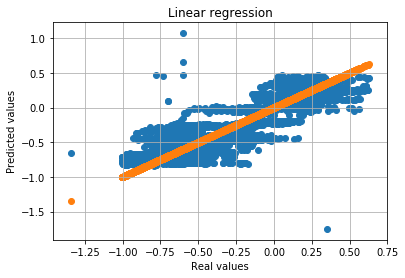

In [13]:
# 散布図描画関数
def Draw_scatter(y_test, y_pred):
    plt.scatter(y_test, y_pred)
    plt.scatter(y_test, y_test)
    plt.title('Linear regression')
    plt.xlabel('Real values')
    plt.ylabel('Predicted values')
    plt.grid()
    plt.show()
    
Draw_scatter(y_test, y_pred) # 関数呼び出し

## 3-4. 他のアルゴリズムのスクリーニング（ランダムフォレスト、k-近傍法）

In [14]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor as RFR
model = RFR(n_jobs=-1, random_state=2525) # clf 以外に model とする場合も多い

# モデルの学習
clf = model.fit(X_train, y_train)

# テストデータ（検証データ）で予測
y_pred = clf.predict(X_test)

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Cafetalk_1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Cafetalk_1\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


平均絶対誤差 (MAE)'： 0.04291337598234936
平均二乗誤差 (MSE)： 0.00410414522453987
二乗平均平方根誤差 (RMSE)： 0.06406360296252366
相関係数 (R)： 0.989443100632906
決定係数 (R2)： 0.978997649390059


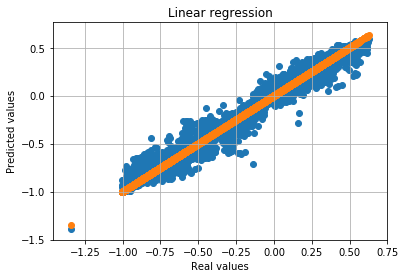

In [15]:
Regression_evaluator(y_test, y_pred) # 関数呼び出し
Draw_scatter(y_test, y_pred) # 関数呼び出し

In [16]:
# k-近傍法
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)  # clf 以外に model とする場合も多い

# モデルの学習
clf = model.fit(X_train, y_train)

# テストデータ（検証データ）で予測
y_pred = clf.predict(X_test)

平均絶対誤差 (MAE)'： 0.03015277223315881
平均二乗誤差 (MSE)： 0.0026383778909352213
二乗平均平方根誤差 (RMSE)： 0.05136514276175256
相関係数 (R)： 0.9932263060059536
決定係数 (R2)： 0.9864984949422323


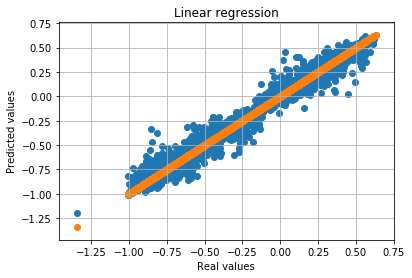

In [17]:
Regression_evaluator(y_test, y_pred) # 関数呼び出し
Draw_scatter(y_test, y_pred) # 関数呼び出し